# Finding closed contours

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
r[:30] = np.nan

In [2]:
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, -0.495)

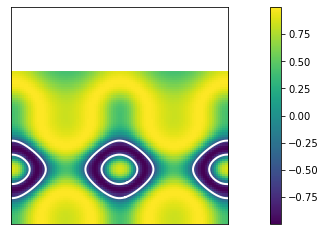

In [3]:
fig, ax = plt.subplots()
im = ax.imshow(r, interpolation='nearest')
plt.colorbar(im)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='white')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Determine if high

In [4]:
import scipy.ndimage as ndimage    


def analyse_contour(r, c):

    # Create an empty image to store the masked array
    r_mask = np.zeros_like(r, dtype='bool')

    # Create a contour image by using the contour coordinates rounded to their nearest integer value
    r_mask[np.round(c[:, 0]).astype('int'), np.round(c[:, 1]).astype('int')] = 1

    # Fill in the hole created by the contour boundary
    r_mask = ndimage.binary_fill_holes(r_mask)

    # Find the change in mean value of inside cf edge to determine if high.
    big = ndimage.binary_erosion(r_mask, structure=np.ones((1,1)))
    sml = ndimage.binary_erosion(r_mask, structure=np.ones((2,2)))
    
    hilo = 'lo' if np.mean(r[big]) - np.mean(r[sml]) > 0 else 'hi'
    area = np.sum(r_mask)

    style = 'closed' if all(c[0] == c[-1]) else 'open'

    return area, hilo, style

In [5]:
contours = [c for c in contours if ~np.isnan(c).any()]
[analyse_contour(r, contour) for contour in contours]

/home/matt/anaconda3/envs/geocomp/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/matt/anaconda3/envs/geocomp/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[(38, 'hi', 'open'),
 (614, 'hi', 'closed'),
 (38, 'hi', 'open'),
 (22, 'hi', 'open'),
 (196, 'hi', 'closed'),
 (22, 'hi', 'open')]

## Finding all contours

In [6]:
def find_largest_closure(r):

    levels = np.linspace(r.min(), r.max(), 100)

    all_largest = [0]
    largest_contours = []
    for level in levels:
        contours = measure.find_contours(r, level)
        
        contours = [c for c in contours if ~np.isnan(c).any()]

        largest = []
        for contour in contours:
            area, hilo, style = analyse_contour(r, contour)

            if (hilo == 'lo') or (style == 'open'):
                continue

            largest.append(area)

        try:
            argmax = np.argmax(largest)
            all_largest.append(largest[argmax])
            largest_contours.append(contours[argmax])
        except:
            continue

    print(all_largest)
    record = np.argmax(all_largest)
    record_level = levels[record]
    record_contour = largest_contours[record]
    record_area = max(all_largest)
    
    return record_contour, record_area, record_level

In [7]:
find_largest_closure(r)

[0]


IndexError: list index out of range